# Часть 1. Проверка гипотезы в приложении для чтения

- **Автор:** Алиса Гизова
- **Дата:** 27.08.2025

## Цели и задачи проекта

**Цель проекта:** проверить гипотезу о том, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении для чтения, чем пользователи из Москвы.

**Задачи:**
- Загрузить и предобработать данные об активности пользователей из Москвы и Санкт-Петербурга.
- Проверить наличие дубликатов и оценить размеры выборок.
- Провести статистическую проверку гипотезы с использованием одностороннего t-теста.
- Подготовить аналитическую записку с интерпретацией результатов и возможными объяснениями.

## Описание данных

Для анализа поступили данные пользователей из Москвы и Санкт-Петербурга с суммой часов их активности из датасета `yandex_knigi_data.csv`:
- `city` - название города;
- `puid` - уникальный идентификатор пользователя;
- `hours` - активность в часах.

## Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Проверка гипотезы в Python.
3. Аналитическая записка.

---

## Загрузка данных и знакомство с ними

In [6]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.power import NormalIndPower
import scipy.stats as st
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [8]:
# Выводим первые строки датафрейма на экран
df.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [9]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


In [10]:
# Сохраняем количество строк в исходном датафрейме
initial_row_count = df.shape[0]

In [11]:
# Количество пропусков и явных дубликатов
print(df.isna().sum().sum(), df.duplicated().sum())

0 0


Пропусков и явных дубликатов не обнаружено.

In [13]:
# Проверяем неявные дубликаты в датафрейме
df.duplicated(subset='puid').sum()

244

In [14]:
# Удаляем неявные дубликаты по столбцу с идентификатором пользователя
df = df.drop_duplicates(subset='puid')

In [15]:
# Сохраняем количество строк после удаления пропусков и дубликатов
final_row_count = df.shape[0]

In [16]:
# Вычисляем относительное значение удаленных строк датафрейма в процентах
removed_row_count_share = round(((initial_row_count - final_row_count) / initial_row_count) * 100, 1)

# Выводим результаты
print(f'Количество строк в исходном датафрейме: {initial_row_count}')
print(f'Количество строк после удаления пропусков и дубликатов: {final_row_count}')
print(f'Процент удаленных строк: {removed_row_count_share}')

Количество строк в исходном датафрейме: 8784
Количество строк после удаления пропусков и дубликатов: 8540
Процент удаленных строк: 2.8


In [17]:
# Проверим уникальные значения в столбцах с жанром игры, названием платформы, рейтингом и годом выпуска
df['city'].unique()

array(['Москва', 'Санкт-Петербург'], dtype=object)

In [18]:
# Статистические показатели по городам
moscow = df[df['city'] == 'Москва']['hours']
spb = df[df['city'] == 'Санкт-Петербург']['hours']

stats_summary = pd.DataFrame({
    'Москва': moscow.describe(),
    'Санкт-Петербург': spb.describe()
}).round(2)
print(stats_summary)

        Москва  Санкт-Петербург
count  6234.00          2306.00
mean     10.88            11.26
std      36.85            39.83
min       0.00             0.00
25%       0.06             0.06
50%       0.92             0.88
75%       5.94             6.14
max     857.21           978.76


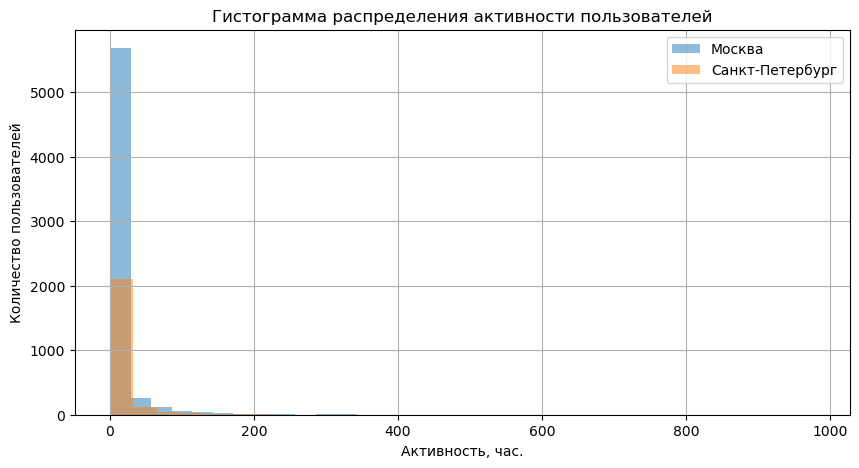

Средняя длительность поездки для пользователей из Москвы 10.88 часов, а для пользователей из Санкт-Петербурга 11.26 часов.


In [19]:
# Гистограмма активности для пользователей по городам
plt.figure(figsize=(10, 5))

moscow.hist(bins=30, alpha=0.5, label='Москва')
spb.hist(bins=30, alpha=0.5, label='Санкт-Петербург')

plt.xlabel('Активность, час.')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма распределения активности пользователей')
plt.legend()

plt.show()

# Расчет и вывод на экран средней длительности поездки для пользователей с подпиской и без
mean_hours_moscow = round(df[df['city'] == 'Москва']['hours'].mean(), 2)
mean_hours_spb = round(df[df['city'] == 'Санкт-Петербург']['hours'].mean(), 2)
print(f'Средняя длительность поездки для пользователей из Москвы {mean_hours_moscow} часов, а для пользователей из Санкт-Петербурга {mean_hours_spb} часов.')

C:\Users\User\AppData\Local\Temp\ipykernel_11244\1872771359.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([moscow, spb], labels=['Москва', 'Санкт-Петербург'], vert=False)


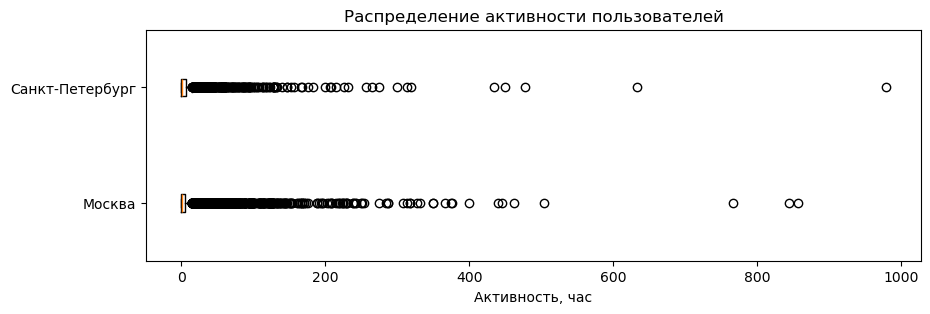

In [20]:
plt.figure(figsize=(10, 3))

# Строим диаграмму размаха
plt.boxplot([moscow, spb], labels=['Москва', 'Санкт-Петербург'], vert=False)

plt.title('Распределение активности пользователей')
plt.xlabel('Активность, час')

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11244\3412186164.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([moscow, spb], labels=['Москва', 'Санкт-Петербург'], vert=False, showfliers=False)


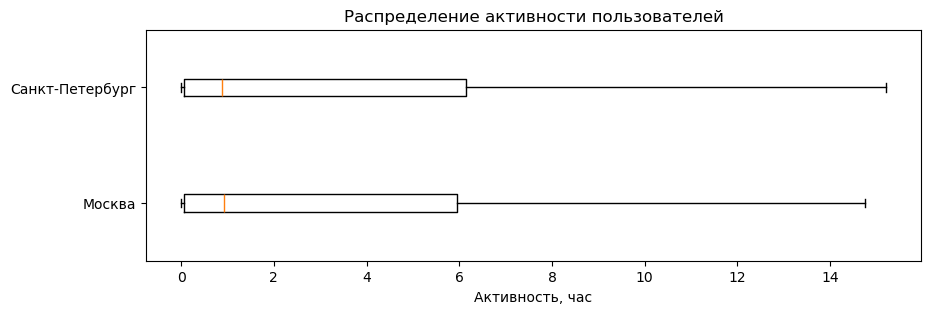

In [21]:
plt.figure(figsize=(10, 3))

# Строим диаграмму размаха, отключив отображение выбросов на диаграмме
plt.boxplot([moscow, spb], labels=['Москва', 'Санкт-Петербург'], vert=False, showfliers=False)

plt.title('Распределение активности пользователей')
plt.xlabel('Активность, час')

plt.show()

## Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [23]:
# Вспомогательная функция, которая будет интерпретировать результаты статистического 
# теста на основе p-value и заданного уровня значимости
def print_stattest_results(p_value:float, alpha:float = 0.05):
    if p_value < alpha:
        print(f'Полученное значение p_value={p_value} меньше критического уровня alpha={alpha}. Принимаем альтернативную гипотезу.')
    else: 
        print(f'Полученное значение p_value={p_value} больше критического уровня alpha={alpha}. Опровергнуть нулевую гипотезу нельзя.')

In [24]:
# Проверка гипотезы
results = ttest_ind(spb, moscow, alternative='greater')
p_value = round(results.pvalue, 4)
print_stattest_results(p_value)
hours_diff = ((mean_hours_spb - mean_hours_moscow) / mean_hours_moscow) * 100

print(f'Средняя активность для пользователей из Москвы {mean_hours_moscow}')
print(f'Средняя активность для пользователей из Санкт-Петербурга {mean_hours_spb}')
print(f"Относительная разница: {hours_diff:.2f}%")

Полученное значение p_value=0.3382 больше критического уровня alpha=0.05. Опровергнуть нулевую гипотезу нельзя.
Средняя активность для пользователей из Москвы 10.88
Средняя активность для пользователей из Санкт-Петербурга 11.26
Относительная разница: 3.49%


## Аналитическая записка


Для проверки гипотезы был использован односторонний t-тест Стьюдента для независимых выборок с неравными дисперсиями (тест Уэлча), так как:
- выборки независимы (пользователи из разных городов),
- объём выборок большой (> 1000), что позволяет применять t-тест даже при нестрогой нормальности.

Уровень статистической значимости выбран **α = 0.05**.

**Результат теста (p-value):**

- p-value (односторонний): ≈ 0.3382

**Вывод на основе p-value:**

На уровне значимости 0.05 мы **не можем отвергнуть нулевую гипотезу**.  
Среднее время активности пользователей в Санкт-Петербурге больше, но это различие статистически не значимо.

**Среднее время активности:**
- Москва: 10.88 часов
- Санкт-Петербург: 11.26 часов

Разница составляет **3.49%**.

Хотя пользователи из Санкт-Петербурга показывают несколько более высокую среднюю активность (на 0.38 часа больше), эта разница может быть объяснена случайными колебаниями в данных, а не реальным систематическим различием между городами.

**Возможные причины полученных результатов:**

1. Высокая вариативность данных - большие индивидуальные различия между пользователями внутри каждого города могут "маскировать" средние различия между городами.

2. Отсутствие реального различия - возможно, поведение пользователей в двух городах действительно не отличается существенно в отношении времени, проводимого в приложении.

----

# Часть 2. Анализ результатов A/B-тестирования

## Цели исследования.



**Контекст:**
Нишевый интернет-магазин специализированных товаров сталкивается с проблемой низкой удобности пользовательского интерфейса, что, согласно обратной связи, негативно влияет на конверсию. Для решения этой проблемы была разработана новая версия сайта. Гипотеза состоит в том, что новый дизайн и улучшенная навигация доказуемо увеличат долю пользователей, совершающих покупку.

**Цель:** оценить, привело ли упрощение интерфейса сайта (внедрение новой версии) к статистически значимому увеличению конверсии зарегистрированных пользователей в покупателей в течение 7 дней после регистрации как минимум на 3 процентных пункта.

**Задачи:**

- Оценить корректность проведения теста.
- Подготовить данные.
- Провести статистический анализ.
- Сформулировать выводы и рекомендации.

In [32]:
# Выводим первые строки датафрейма participants на экран
participants.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [33]:
# Выводим информацию о датафрейме participants
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


In [34]:
# Сохраняем количество строк в исходном датафрейме participants
initial_row_count_participants = participants.shape[0]

In [35]:
# Выводим первые строки датафрейма events на экран
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [36]:
# Выводим информацию о датафрейме events
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


In [37]:
# Сохраняем количество строк в исходном датафрейме events
initial_row_count_events = events.shape[0]

In [38]:
# Количество пропусков и явных дубликатов в датафреймах
print(participants.isna().sum().sum(), participants.duplicated().sum())
print(events.isna().sum().sum(), events.duplicated().sum())

0 0
538264 36318


Найдено 36318 явных дубликатов в датафрейме `events`. Их необходимо удалить, предварительно отсортировав датафрейм.

In [40]:
# Сортируем датафрейм по всем столбцам
events = events.sort_values(by=list(events.columns))

# Удаляем явные дубликаты
events = events.drop_duplicates()

In [41]:
# Проверяем неявные дубликаты в датафрейме participants по идентификатору пользователя
participants.duplicated(subset='user_id').sum()

887

In [42]:
# Удаляем неявные дубликаты по столбцу с идентификатором пользователя
participants = participants.drop_duplicates(subset='user_id')

In [43]:
# Сохраняем количество строк после удаления дубликатов
final_row_count_participants = participants.shape[0]
final_row_count_events = events.shape[0]

In [44]:
# Вычисляем относительное значение удаленных строк датафреймов в процентах
removed_row_count_share_participants = round(((initial_row_count_participants - final_row_count_participants) / initial_row_count_participants) * 100, 1)
removed_row_count_share_events = round(((initial_row_count_events - final_row_count_events) / initial_row_count_events) * 100, 1)

# Выводим результаты для датафрейма participants
print(f'Количество строк в исходном датафрейме: {initial_row_count_participants}')
print(f'Количество строк после удаления пропусков и дубликатов: {final_row_count_participants}')
print(f'Процент удаленных строк в датафрейме participants: {removed_row_count_share_participants}')

# Выводим результаты для датафрейма events
print(f'\nКоличество строк в исходном датафрейме: {initial_row_count_events}')
print(f'Количество строк после удаления пропусков и дубликатов: {final_row_count_events}')
print(f'Процент удаленных строк в датафрейме events: {removed_row_count_share_events}')

Количество строк в исходном датафрейме: 14525
Количество строк после удаления пропусков и дубликатов: 13638
Процент удаленных строк в датафрейме participants: 6.1

Количество строк в исходном датафрейме: 787286
Количество строк после удаления пропусков и дубликатов: 750968
Процент удаленных строк в датафрейме events: 4.6


## Корректность проведения теста:


In [46]:
# Выделяем пользователей, участвующих в целевом тесте interface_eu_test
interface_test_users = participants[participants['ab_test'] == 'interface_eu_test']

# Проверяем соответствие ТЗ: только группы A и B
print("Группы в тесте interface_eu_test:")
print(interface_test_users['group'].value_counts())

# Проверяем равномерность распределения
group_counts = interface_test_users['group'].value_counts()

# Рассчитываем процентную разницу
A = group_counts.get('A', 0)  # Контрольная группа
B = group_counts.get('B', 0)  # Тестовая группа
P = 100 * (abs(A - B) / A) if A != 0 else 0

print(f"\nРаспределение пользователей по группам:")
print(f"Группа A (контрольная): {A} пользователей")
print(f"Группа B (тестовая): {B} пользователей")
print(f"\nПроцентная разница в размерах групп: {P:.2f}%")

Группы в тесте interface_eu_test:
group
B    5229
A    5174
Name: count, dtype: int64

Распределение пользователей по группам:
Группа A (контрольная): 5174 пользователей
Группа B (тестовая): 5229 пользователей

Процентная разница в размерах групп: 1.06%


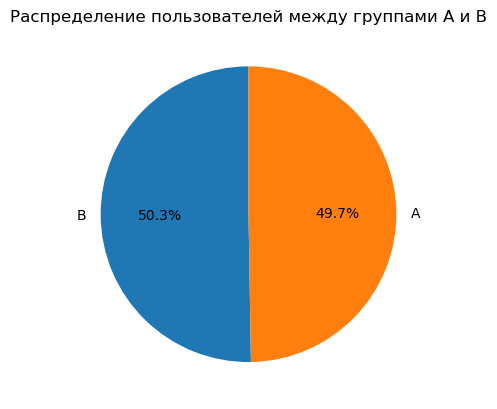

In [47]:
# Визуализация распределения в группах
plt.pie(group_counts, 
        labels=group_counts.index, 
        autopct='%1.1f%%',
        startangle=90)
plt.title('Распределение пользователей между группами A и B')
plt.show()

In [48]:
# Создаем множества пользователей из каждой группы
users_group_a = set(interface_test_users[interface_test_users['group'] == 'A']['user_id'].unique())
users_group_b = set(interface_test_users[interface_test_users['group'] == 'B']['user_id'].unique())

# Находим пересечение пользователей
common_users = users_group_a & users_group_b
num_common_users = len(common_users)

if num_common_users > 0:
    print(f"Обнаружено {num_common_users} пользователей, присутствующих в обеих группах:")
    print(common_users)
    
    # Выводим данные проблемных пользователей для анализа
    print("\nДанные пересекающихся пользователей:")
    display(sessions_test_part[sessions_test_part['user_id'].isin(common_users)].sort_values('user_id'))
else:
    print("Пересечений пользователей между группами не обнаружено.")

Пересечений пользователей между группами не обнаружено.


- **Соответствие ТЗ:** в тесте `interface_eu_test` присутствуют только две группы: A (контрольная) и B (тестовая). Это соответствует техническому заданию.

- **Равномерность распределения:** распределение пользователей между группами A и B близко к равномерному (50.3% в группе A и 49.7% в группе B).

- **Отсутствие пересечений:** анализ показывает, что нет пользователей, участвующих одновременно в двух тестовых группах.

In [50]:
# Оставляем только события пользователей из целевого теста interface_eu_test
interface_user_ids = interface_test_users['user_id']
interface_events = events[events['user_id'].isin(interface_user_ids)].copy()

In [51]:
# Определяем горизонт анализа (7 дней)
# Найдем время регистрации для каждого пользователя
registration_times = interface_events[interface_events['event_name'] == 'registration'][['user_id', 'event_dt']]
registration_times.rename(columns={'event_dt': 'reg_dt'}, inplace=True)

# Присоединим время регистрации к таблице событий
interface_events = interface_events.merge(registration_times, on='user_id', how='left')

# Рассчитаем лайфтайм события (разница между временем события и временем регистрации)
interface_events['lifetime'] = (interface_events['event_dt'] - interface_events['reg_dt']).dt.total_seconds() / 3600 / 24 # в днях

# Оставляем только события, произошедшие в первые 7 дней после регистрации
interface_events_7d = interface_events[interface_events['lifetime'] <= 7]

Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [53]:
# Оцениваем достаточность выборки
# Задаём параметры
alpha = 0.05  # Уровень значимости
power = 0.8  # Мощность теста
mde = 0.03  # Минимальный детектируемый эффект

# Рассчитаем стандартизированную разницу
p1 = 0.3  # Базовая конверсия
p2 = p1 + mde
effect_size = (p2 - p1) / np.sqrt((p1*(1-p1) + p2*(1-p2))/2)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")
print(f"Фактический размер группы A: {group_counts['A']}")
print(f"Фактический размер группы B: {group_counts['B']}")

Необходимый размер выборки для каждой группы: 3759
Фактический размер группы A: 5174
Фактический размер группы B: 5229


In [54]:
# Рассчитаем конверсию в покупку в течение 7 дней для каждой группы
# Найдем уникальных пользователей, которые совершили покупку в первые 7 дней
purchasers = interface_events_7d[interface_events_7d['event_name'] == 'purchase']['user_id'].unique()

# Создадим датафрейм со всеми пользователями теста и отметим, кто совершил покупку
conversion_data = interface_test_users[['user_id', 'group']].copy()
conversion_data['converted'] = conversion_data['user_id'].isin(purchasers).astype('int')

# Сгруппируем по группе и посчитаем конверсию
group_stats = conversion_data.groupby('group').agg(
    total_users=('user_id', 'count'),
    conversions=('converted', 'sum')
)
group_stats['conversion_rate'] = round(group_stats['conversions'] / group_stats['total_users'], 4)

print("\nРезультаты конверсии за 7 дней:")
print(group_stats)

# Вычисляем разницу между группами
rate_diff = (group_stats.loc['B', 'conversion_rate'] - group_stats.loc['A', 'conversion_rate']) * 100
rel_diff = rate_diff / group_stats.loc['A', 'conversion_rate']

# Выводим результаты
print(f"Результаты сравнения:")
print(f"Группа A (контрольная): {group_stats.loc['A', 'conversion_rate']:.2%}")
print(f"Группа B (тестовая): {group_stats.loc['B', 'conversion_rate']:.2%}")
print(f"\nАбсолютная разница: {rate_diff:.2f}%")
print(f"Относительная разница: {rel_diff:.2f}%")


Результаты конверсии за 7 дней:
       total_users  conversions  conversion_rate
group                                           
A             5174         1427           0.2758
B             5229         1532           0.2930
Результаты сравнения:
Группа A (контрольная): 27.58%
Группа B (тестовая): 29.30%

Абсолютная разница: 1.72%
Относительная разница: 6.24%


Конверсия в группе B (29.3%) оказалась выше, чем в группе A (27.6%).

## Оценка результатов A/B-тестирования:

Нулевая гипотеза $H_0: \mu_{\text{B}} \leq \mu_{\text{A}}$ <br> Конверсия в группе B меньше или равна конверсии в группе A.

Альтернативная гипотеза $H_1: \mu_{\text{B}} > \mu_{\text{A}}$ <br> Конверсия в группе B больше конверсии в группе A как минимум на 3 процентных пункта.

In [58]:
# Подготовка данных
conversions_a = group_stats.loc['A', 'conversions']
users_a = group_stats.loc['A', 'total_users']

conversions_b = group_stats.loc['B', 'conversions']
users_b = group_stats.loc['B', 'total_users']

# Проведение z-теста для пропорций
z_stat, p_value = proportions_ztest([conversions_b, conversions_a], [users_b, users_a])

# Вывод результатов
print(f"Результаты статистического теста:")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("\nВывод: Изменение статистически значимо (p < 0.05).")
    if z_stat > 0:
        print("Новый интерфейс увеличил конверсию в покупателей.")
    else:
        print("Новый интерфейс достоверно уменьшил конверсию в покупателей.")
else:
    print("\nВывод: Изменение статистически не значимо (p ≥ 0.05).")

Результаты статистического теста:
p-value = 0.0521

Вывод: Изменение статистически не значимо (p ≥ 0.05).


**Характеристики эксперимента:**
- Продолжительность теста: 7 дней;
- Общее количество пользователей: 10403 (5174 в группе A, 5229 в группе B);
- Ключевая метрика: конверсия зарегистрированных пользователей в покупателей.

**Влияние нового интерфейса:**
- Контрольная группа (A): конверсия составила 27.58% пользователей;
- Тестовая группа (B): конверсия составила 29.30% пользователей;
- Абсолютный прирост: +1.72%;
- Относительное улучшение: +6.24%.

**Статистическая значимость:**
- p-value = 0.0521;
- Изменение статистически значимо (p ≥ 0.05);
- Новый интерфейс улучшает конверсию, но не достигает целевого эффекта.

**Рекомендации для команды интернет-магазина BitMotion Kit:**

- **Отказаться от внедрения** новой версии интерфейса, протестированной в рамках `interface_eu_test`.
- Разобраться в причинах провала гипотезы. Почему упрощение интерфейса не сработало? Возможные причины:
    - Новая версия могла быть упрощена чрезмерно, удалены важные для принятия решения о покупке элементы (детальные описания, отзывы, доводы к покупке).
    - Изменения могли внести путаницу или ухудшить UX для постоянных пользователей.

**Заключение:**
Эксперимент не подтвердил гипотезу о том, что новый интерфейс в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта. Полученные результаты не позволяют рекомендовать его к полноценному внедрению.